# Basic Recommender System for Online Courses by Category Selection

In this study I will analyse MIT and Harvard Online Courses data set and create a basic recommendation system based on course category.

By choosing from the four main course category, system will recommend top 5 rated and popular courses in that category.

In [74]:
# LOADING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
# READING THE DATA SET

data = pd.read_csv('course_data.csv')
df = data.copy()
pd.options.display.max_columns = 23

In [76]:
# ELIMINATING UNNECESSARY COLUMNS

df = df.drop(columns=['Launch Date', 'Year', 'Honor Code Certificates', '% Certified of > 50% Course Content Accessed',
                      '% Played Video', '% Grade Higher Than Zero', 'Total Course Hours (Thousands)',
                      'Median Hours for Certification'])
df.head()

In [78]:
# IS THERE ANY NAN VALUE IN THE DATA SET?

df.isnull().sum()

Institution                                0
Course Number                              0
Course Title                               0
Instructors                                1
Course Subject                             0
Participants (Course Content Accessed)     0
Audited (> 50% Course Content Accessed)    0
Certified                                  0
% Audited                                  0
% Certified                                0
% Posted in Forum                          0
Median Age                                 0
% Male                                     0
% Female                                   0
% Bachelor's Degree or Higher              0
dtype: int64

In [79]:
# DEALING THE NAN DATA

df['Instructors'] = df['Instructors'].fillna('-')

In [80]:
# ANALYSING THE DATA TYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 15 columns):
Institution                                290 non-null object
Course Number                              290 non-null object
Course Title                               290 non-null object
Instructors                                290 non-null object
Course Subject                             290 non-null object
Participants (Course Content Accessed)     290 non-null int64
Audited (> 50% Course Content Accessed)    290 non-null int64
Certified                                  290 non-null int64
% Audited                                  290 non-null float64
% Certified                                290 non-null float64
% Posted in Forum                          290 non-null float64
Median Age                                 290 non-null float64
% Male                                     290 non-null float64
% Female                                   290 non-null float64
% Bachelor

MITx        161
HarvardX    129
Name: Institution, dtype: int64

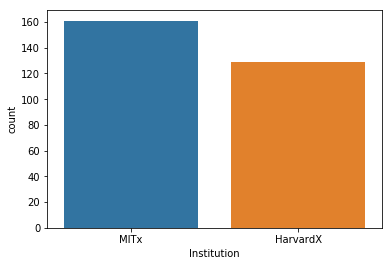

In [81]:
# COURSE SUPPLIERS

sns.countplot(x='Institution', data=df);
df['Institution'].value_counts()

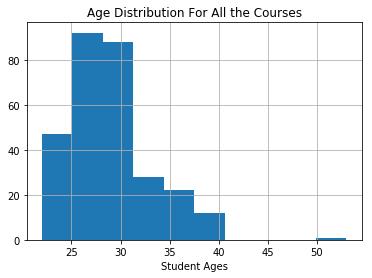

In [111]:
# AGE DISTRIBUTION FOR ALL OF THE COURSES

df['Median Age'].hist()
plt.title('Age Distribution For All the Courses')
plt.xlabel('Student Ages');

Humanities, History, Design, Religion, and Education    94
Science, Technology, Engineering, and Mathematics       91
Government, Health, and Social Science                  75
Computer Science                                        30
Name: Course Subject, dtype: int64


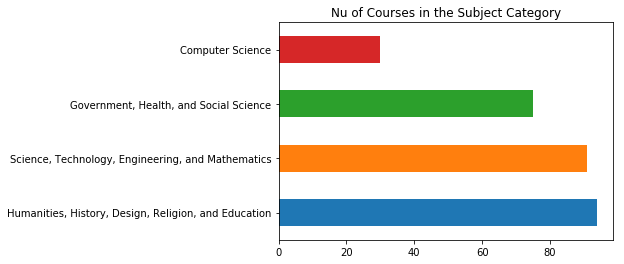

In [83]:
# ANALYSING THE COURSE CATEGORIES

print(df['Course Subject'].value_counts())
df['Course Subject'].value_counts().plot(kind='barh')
plt.title('Nu of Courses in the Subject Category');

In [84]:
# INITIAL STATISTICS OF THE COLUMNS

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Participants (Course Content Accessed),290.0,15344.334483,28207.578733,322.00,3815.0000,7901.500,18038.2500,301082.00
Audited (> 50% Course Content Accessed),290.0,2549.172414,3095.159969,187.00,755.2500,1517.000,3383.0000,25637.00
Certified,290.0,843.810345,1105.594372,0.00,139.5000,395.500,1201.7500,5783.00
% Audited,290.0,24.916966,15.883538,2.63,14.2150,20.425,33.8375,83.96
% Certified,290.0,7.782586,6.972437,0.00,2.4075,5.950,10.6875,33.98
% Posted in Forum,290.0,9.347517,7.517141,0.00,3.9925,7.245,14.1075,35.28
Median Age,290.0,29.300000,4.047897,22.00,26.0000,29.000,31.0000,53.00
% Male,290.0,67.010690,15.843642,25.24,54.1700,66.515,81.6325,93.44
% Female,290.0,32.989310,15.843642,6.56,18.3675,33.485,45.8300,74.76
% Bachelor's Degree or Higher,290.0,72.078724,10.256434,44.95,64.5150,73.055,79.2450,98.11


## Demographic Recommendation

### 1. By Course Weight (Rating)

Course Weight = ((Nu of Students of the Course / Nu of All Students) x 0.60) + (Forum Posts x 0.30) + (Aquiered Certifications x 0.10)

In [113]:
# CREATING COURSE WEIGHT COLUMN

df['Weight Avg'] = ((df['Participants (Course Content Accessed)'] / df['Participants (Course Content Accessed)'].sum())*0.60) + (df['% Posted in Forum']*0.30)+(df['% Certified']*0.10)

In [86]:
# ERASING THE DUPLICATED COURSES

df_new = df.drop_duplicates(subset=['Course Number', 'Course Title'], keep=False)

In [129]:
# TOP 10 COURSES BY RATING

df_present1 = df_new[['Course Title', 'Course Subject', 'Participants (Course Content Accessed)', '% Audited', '% Certified', 
                      '% Posted in Forum', 'Weight Avg']].sort_values(by=['Weight Avg'], ascending=False).head(10)

### 2. By Number of Students

In [130]:
# TOP 1O COURSES BY PARTICIPANTS

df_present2 = df_new[['Course Title', 'Course Subject', 'Participants (Course Content Accessed)', '% Audited', '% Certified', 
                      '% Posted in Forum', 'Weight Avg']].sort_values(by=['Participants (Course Content Accessed)'], ascending=False).head(10)

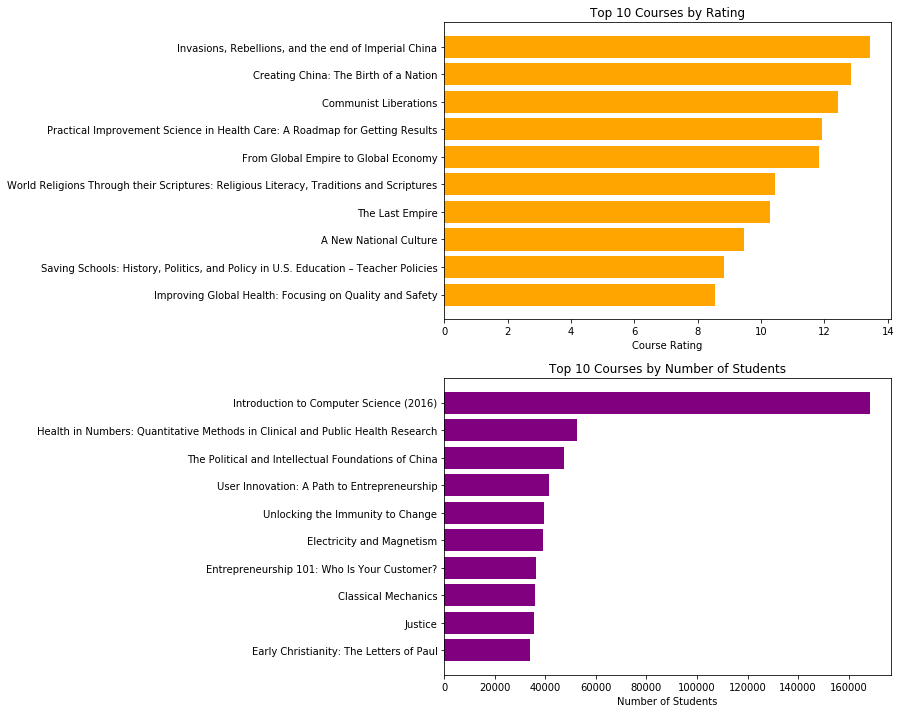

In [131]:
# COMPARISON OF TOP 10 COURSES BY RATING AND POPULARITY

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.barh(df_present1['Course Title'].head(10), df_present1['Weight Avg'].head(10), color='orange')
plt.gca().invert_yaxis()
plt.title('Top 10 Courses by Rating')
plt.xlabel('Course Rating')

plt.subplot(2,1,2)
plt.barh(df_present2['Course Title'].head(10), df_present2['Participants (Course Content Accessed)'].head(10), color='purple')
plt.gca().invert_yaxis()
plt.title('Top 10 Courses by Number of Students')
plt.xlabel('Number of Students');

## Category Base Recommendation

In [90]:
# COURSE CATEGORIES

subject_list = list(df_new['Course Subject'].unique())
subject_dict = {'a': subject_list[0], 'b': subject_list[1], 'c': subject_list[2], 'd': subject_list[3]}

In [107]:
# CREATING FUNCTION TO RECOMMEND TOP 5 COURSES BY CATEGORY SELECTION 

def recommend():
    print('a) ', subject_dict['a'])
    print('b) ', subject_dict['b'])
    print('c) ', subject_dict['c'])
    print('d) ', subject_dict['d'])
    
    user_input = input('\nChoose the subject you want to learn: \n')
    
    course_subject = subject_dict[user_input]
    
    filter_subject = df_new['Course Subject'] == course_subject
    
    print('\n Top 5 Rated Courses in %a \n' % subject_dict[user_input])
    df_rated = df_new[filter_subject].sort_values(by=['Weight Avg'], ascending=False).head()
    print(df_rated[['Course Number', 'Course Title']])
    
    print('\nTop 5 Popular Courses in %a \n' % subject_dict[user_input])
    df_popular = df_new[filter_subject].sort_values(by=['Participants (Course Content Accessed)'], ascending=False).head()
    print(df_popular[['Course Number', 'Course Title']])
    
    restart = input('\nWould you like to look for a different subject? (y/n)\n')
    
    if restart == 'y' or restart == 'yes':
        recommend()
    elif restart == 'n' or restart == 'no':
        print('\nGood bye!')
    else:
        print('\nWrong input.')
    return

In [108]:
# APPLY THE RECOMMENDATION BY CATEGORY SELECTION

recommend()

a)  Government, Health, and Social Science
b)  Science, Technology, Engineering, and Mathematics
c)  Humanities, History, Design, Religion, and Education
d)  Computer Science

Choose the subject you want to learn: 
a

 Top 5 Rated Courses in 'Government, Health, and Social Science' 

    Course Number                                       Course Title
228        PH556x  Practical Improvement Science in Health Care: ...
79         PH555x  Improving Global Health: Focusing on Quality a...
42          SW25x  Global Health: Case Studies from a Biosocial P...
279       LAUNCHx                           Becoming an Entrepreneur
218        PH557x   Lessons from Ebola: Preventing the Next Pandemic

Top 5 Popular Courses in 'Government, Health, and Social Science' 

    Course Number                                       Course Title
4          PH207x  Health in Numbers: Quantitative Methods in Cli...
149       UINOV8x        User Innovation: A Path to Entrepreneurship
47        15.390x        

**Thank you so much and please don't forget to upvote if you like my study.**

**Melih** 